<font size = "7" color ="orange"> Customer Segmentation 🔎👀👌👨‍👩‍👧‍👦

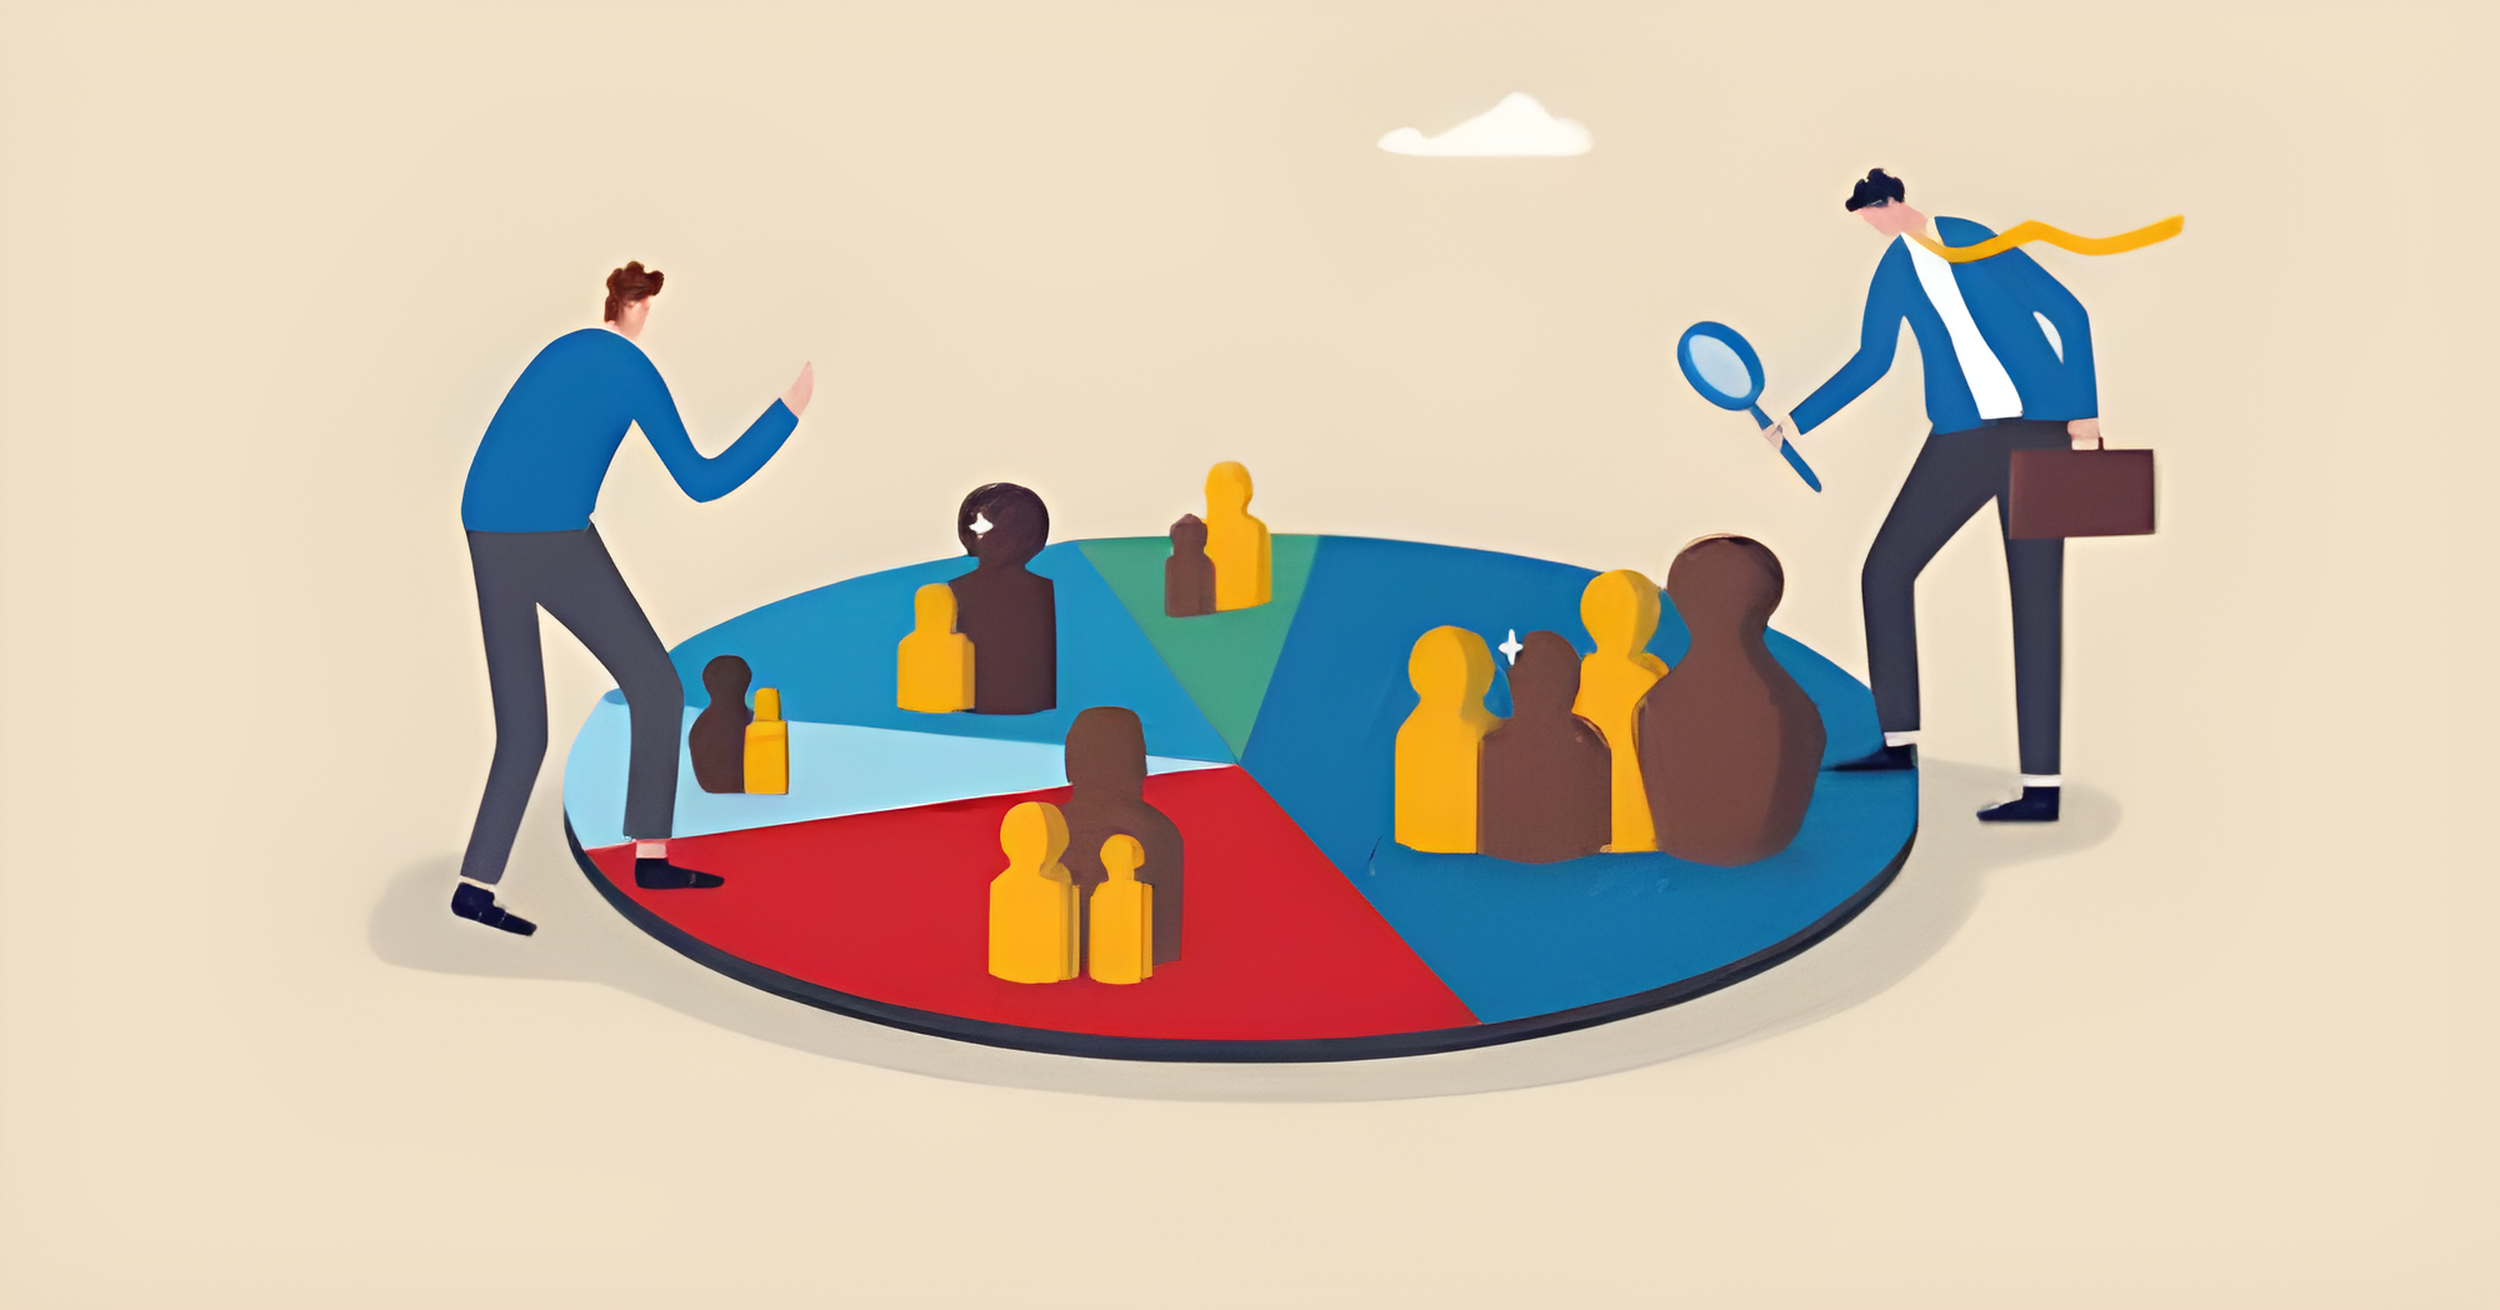

In [1]:
import os
os.environ["KAGGLE_CONFIG_DIR"] = "/content/"

In [2]:
! kaggle datasets download -d msahmed/customer-buying-dataset

Dataset URL: https://www.kaggle.com/datasets/msahmed/customer-buying-dataset
License(s): Apache 2.0
  0% 0.00/30.4k [00:00<?, ?B/s]
100% 30.4k/30.4k [00:00<00:00, 45.0MB/s]


In [3]:
! unzip customer-buying-dataset.zip

Archive:  customer-buying-dataset.zip
  inflating: customer_dataset.xlsx   


# <font color = "orange">**Analysis 🔍📊🔢**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_excel("/content/customer_dataset.xlsx")

In [ ]:
df.head()

,Cust iD,Region,Payment_mode,how_they_buy,Amount_in_usd,Product_type,Time Of Day
0,10001,East,Paypal,Web,20.19,Online,22:19:00
1,10002,West,Credit,Web,17.85,Online,13:27:00
2,10003,North,Credit,Web,23.98,Online,14:27:00
3,10004,West,Paypal,Email,23.51,Book,15:38:00
4,10005,South,Credit,Web,15.33,Book,15:21:00


In [ ]:
df.shape

(510, 7)

In [ ]:
# number of missing values
df.isna().sum()

Cust iD          0
Region           0
Payment_mode     0
how_they_buy     0
Amount_in_usd    0
Product_type     0
Time Of Day      0
dtype: int64

In [ ]:
# number of duplicated rows
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Cust iD        510 non-null    int64  
 1   Region         510 non-null    object 
 2   Payment_mode   510 non-null    object 
 3   how_they_buy   510 non-null    object 
 4   Amount_in_usd  510 non-null    float64
 5   Product_type   510 non-null    object 
 6   Time Of Day    510 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 28.0+ KB


In [ ]:
# statistical info for numerical cols
df.describe()

,Cust iD,Amount_in_usd
count,510.000000,510.000000
mean,10255.500000,38.826686
std,147.368586,56.034412
min,10001.000000,15.060000
25%,10128.250000,17.732500
50%,10255.500000,20.465000
75%,10382.750000,23.370000
max,10510.000000,247.140000


<font color = "blue" size = "5">**1. High Percent of purchases is less 24$**

<font color = "blue" size = "5">**2. It possible to depend on product type or bought item**

In [6]:
# convert dtype into string
df['Time Of Day'] = df['Time Of Day'].astype(str)

In [7]:
# create 2-new features
df[['Hours', 'Minutes']] = df['Time Of Day'].str.split(':', expand=True)[[0,1]]

In [8]:
# drop Time Of Day col
df.drop(columns = "Time Of Day", inplace = True)

In [ ]:
# statistical info for categorical cols
df.describe(include="object")

,Region,Payment_mode,how_they_buy,Product_type,Hours,Minutes
count,510,510,510,510,510,510
unique,4,2,2,2,23,60
top,West,Credit,Web,Book,20,00
freq,211,322,368,283,40,34


<font color = "blue" size = "5">**Initially, the highest frequency of cols in order : (West, Credit, Web, Book, 20, 00)**


<ipython-input-16-bb929aa71d9e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=top_df, palette="Set2", ax=axes[indx])
<ipython-input-16-bb929aa71d9e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=top_df, palette="Set2", ax=axes[indx])
<ipython-input-16-bb929aa71d9e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=top_df, palette="Set2", ax=axes[indx])
<ipython-input-16-bb929aa71d9e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. A

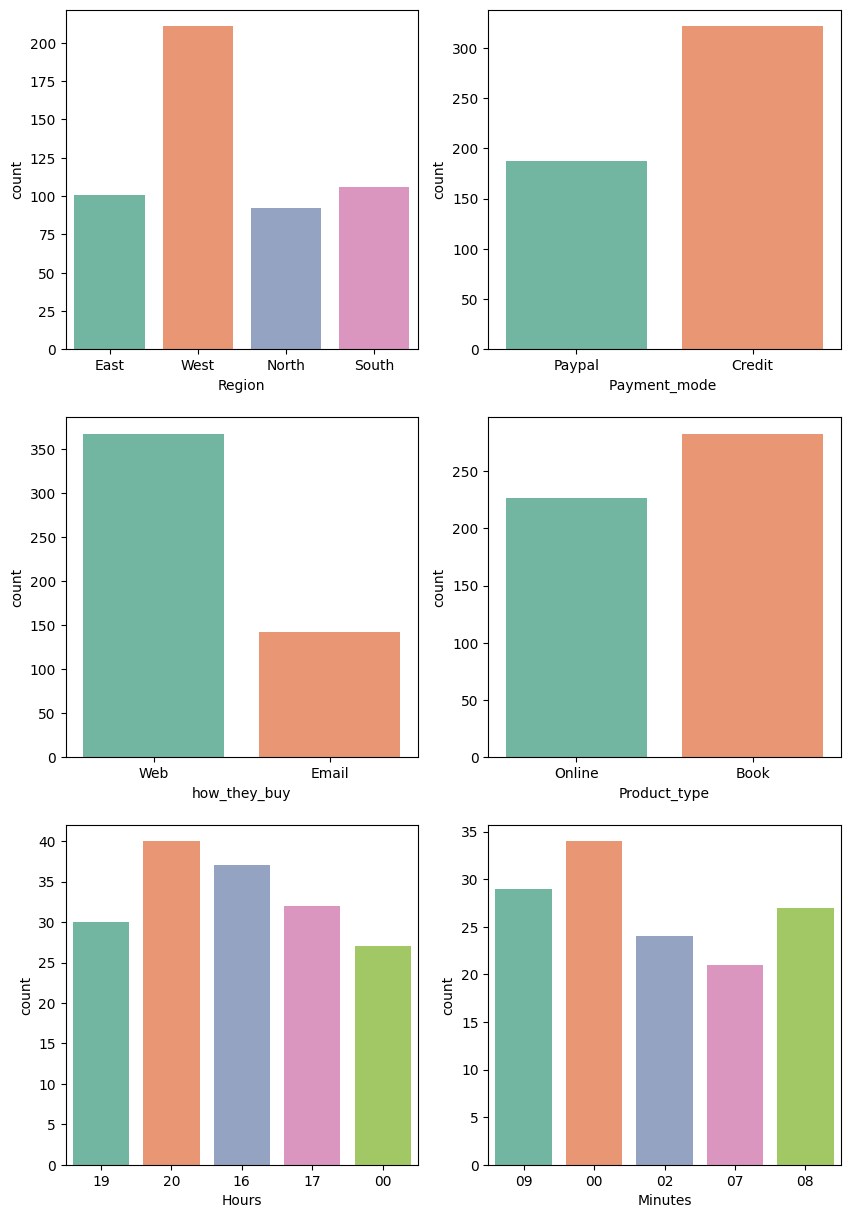

In [ ]:
#@title <font color = "orange" size = "6">**Frequency of categories of each col**

cols = df.select_dtypes(include="object").columns
fig, ax = plt.subplots(figsize=(10,15), nrows = 3, ncols= 2)
axes = ax.flatten()
for indx, col in enumerate(cols):
    if indx < len(axes):  # Ensure there are enough subplots for the columns
        # Get the top 5 most frequent values
        top_values = df[col].value_counts().nlargest(5).index
        top_df = df[df[col].isin(top_values)]

        # Create the count plot
        sns.countplot(x=col, data=top_df, palette="Set2", ax=axes[indx])


In [ ]:
df.columns

Index(['Cust iD', 'Region', 'Payment_mode ', 'how_they_buy', 'Amount_in_usd',
       'Product_type', 'Hours', 'Minutes'],
      dtype='object')

In [9]:
# remove any space from begin and end of cols
df.columns = df.columns.str.strip()

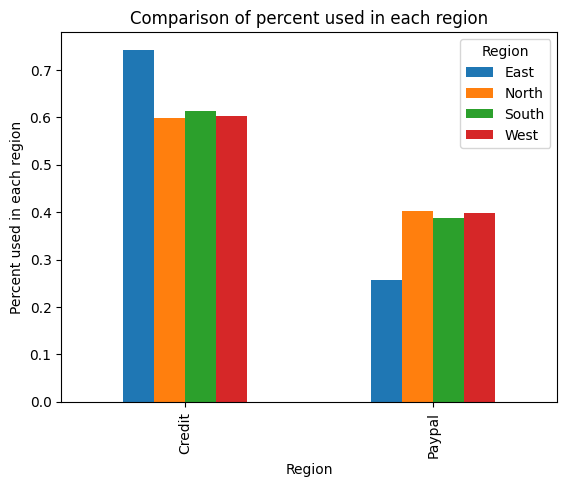

In [ ]:
#@title <font color = "orange" size = "6">**Comparison of amounts paid in each region**

payEachRegion = pd.crosstab(df['Payment_mode'], df["Region"], normalize = "columns")
payEachRegion.plot.bar()
plt.title("Comparison of percent used in each region")
plt.xlabel("Region")
plt.ylabel("Percent used in each region")
plt.show()

<font color = "blue" size = "5">**Generally, Credit card used more than Paypal in all regions**

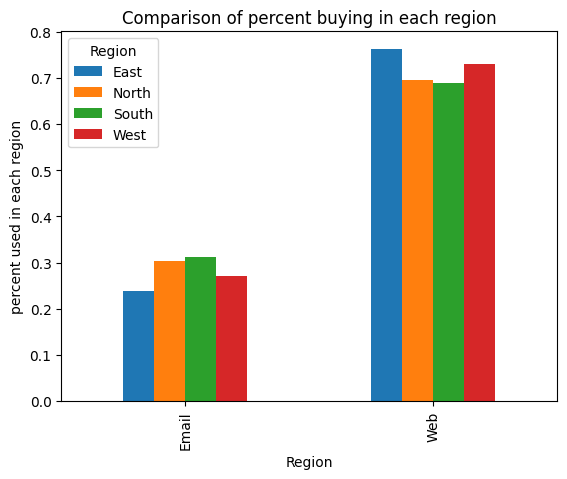

In [10]:
#@title <font color = "orange" size = "6">**Comparison of percent buying in each region**

buyEachRegion = pd.crosstab(df['how_they_buy'], df["Region"], normalize = "columns")
buyEachRegion.plot.bar()
plt.title("Comparison of percent buying in each region")
plt.xlabel("Region")
plt.ylabel("percent used in each region")
plt.show()

<font color = "blue" size = "5">**Generally, buying by web is more than Email noticeably**

<function matplotlib.pyplot.show(close=None, block=None)>

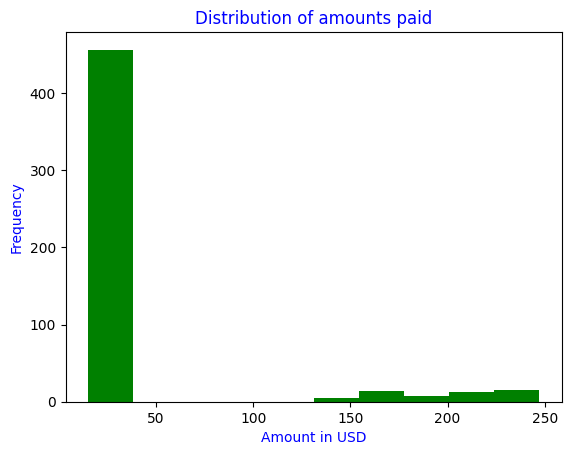

In [ ]:
#@title <font color = "orange" size = "6"> **Distribution of amounts paid**
plt.hist(df["Amount_in_usd"], color = "green")
plt.title("Distribution of amounts paid", color = "blue")
plt.xlabel("Amount in USD", color = 'blue')
plt.ylabel("Frequency", color = 'blue')
plt.show

<font color = "blue" size = "5"> **As we see there are 2 categories : low and high Amount**

In [ ]:
df_Credit = df[df["Payment_mode"] == "Credit"]
df_paypal = df[df["Payment_mode"] == "Paypal"]

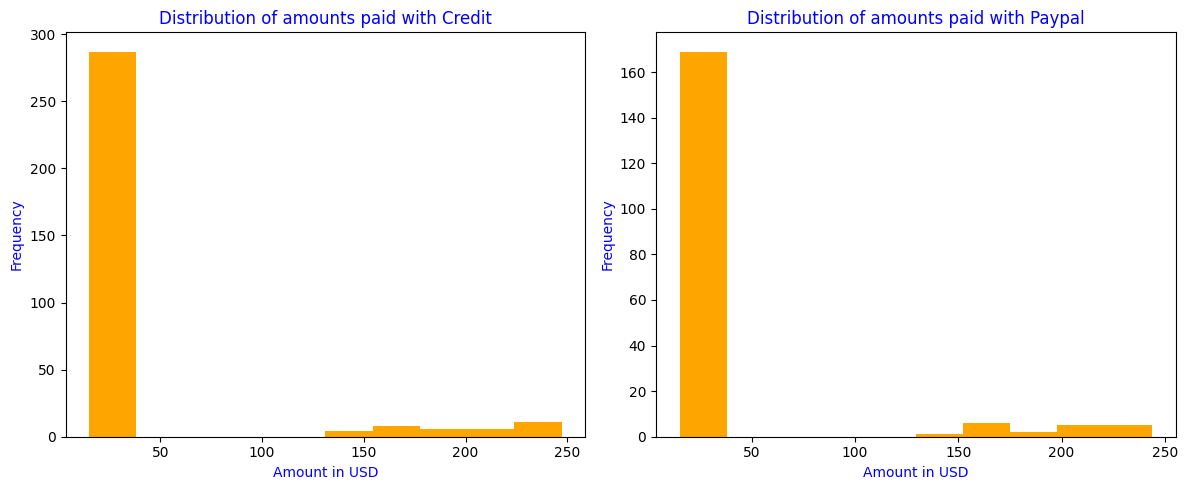

In [ ]:
#@title <font color = "orange" size = "6"> **Distribution of amounts paid by credit & Paypal**

fig, ax = plt.subplots(figsize=(12, 5), nrows=1, ncols=2)

# First subplot for Credit
ax[0].hist(df_Credit["Amount_in_usd"], color="orange")
ax[0].set_title("Distribution of amounts paid with Credit", color="blue")
ax[0].set_xlabel("Amount in USD", color='blue')
ax[0].set_ylabel("Frequency", color='blue')

# Second subplot for Paypal
ax[1].hist(df_paypal["Amount_in_usd"], color="orange")
ax[1].set_title("Distribution of amounts paid with Paypal", color="blue")
ax[1].set_xlabel("Amount in USD", color='blue')
ax[1].set_ylabel("Frequency", color='blue')

# Adjust layout
plt.tight_layout()
plt.show()

<font color = "blue" size = "5">**Generally, both low and high amount paid by credit and paypal**

In [ ]:
df_web = df[df["how_they_buy"] == "Web"]
df_email = df[df["how_they_buy"] == "Email"]

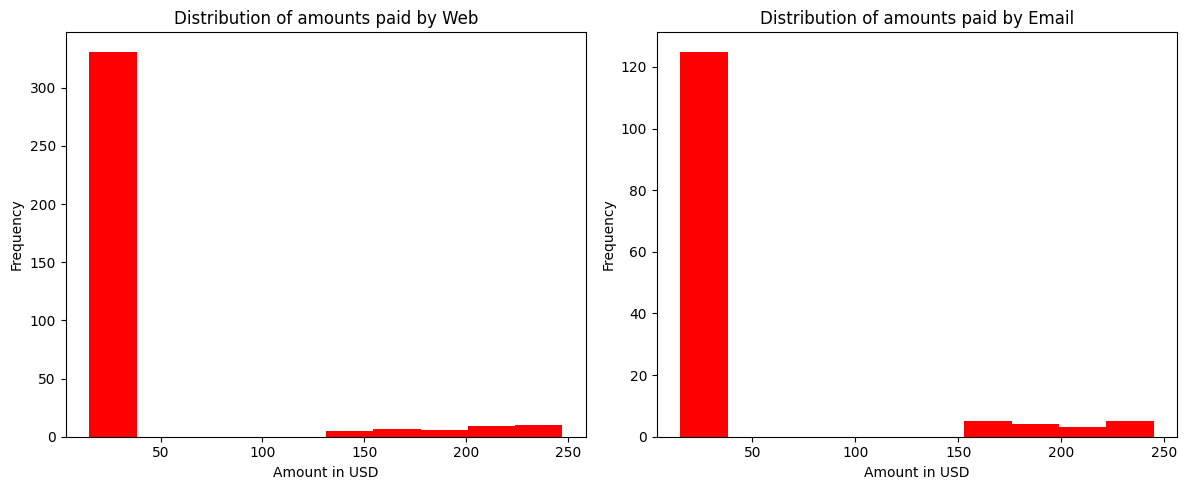

In [ ]:
#@title <font color = "orange" size = "6"> **Distribution of amounts paid by Web & Email**

fig, ax = plt.subplots(figsize=(12, 5), nrows=1, ncols=2)

# First subplot for Credit
ax[0].hist(df_web["Amount_in_usd"], color="red")
ax[0].set_title("Distribution of amounts paid by Web")
ax[0].set_xlabel("Amount in USD")
ax[0].set_ylabel("Frequency")

# Second subplot for Paypal
ax[1].hist(df_email["Amount_in_usd"], color="red")
ax[1].set_title("Distribution of amounts paid by Email")
ax[1].set_xlabel("Amount in USD")
ax[1].set_ylabel("Frequency")

# Adjust layout
plt.tight_layout()
plt.show()

<font color = "blue" size = "5">**Generally, both low and high amount paid by web and email**

In [ ]:
pd.crosstab(df.Payment_mode, df.how_they_buy, normalize = "index")

how_they_buy,Email,Web
Payment_mode,,
Credit,0.276398,0.723602
Paypal,0.281915,0.718085


<font color = "blue" size = "5">**Web used more than email in both credit and paypal**

In [ ]:
df.Hours.value_counts()

Hours
20    40
16    37
17    32
19    30
00    27
10    26
09    24
11    24
15    24
13    23
08    23
18    22
14    21
12    20
05    18
21    18
07    16
01    15
06    15
03    15
04    14
02    13
22    13
Name: count, dtype: int64

In [11]:
df.Hours = df.Hours.astype("int64")

In [ ]:
df.Hours.unique()

array([22, 13, 14, 15, 21,  4, 19,  1, 10,  9,  5, 20, 18, 12, 16, 17,  2,
        0,  7,  6,  3,  8, 11])

<function matplotlib.pyplot.show(close=None, block=None)>

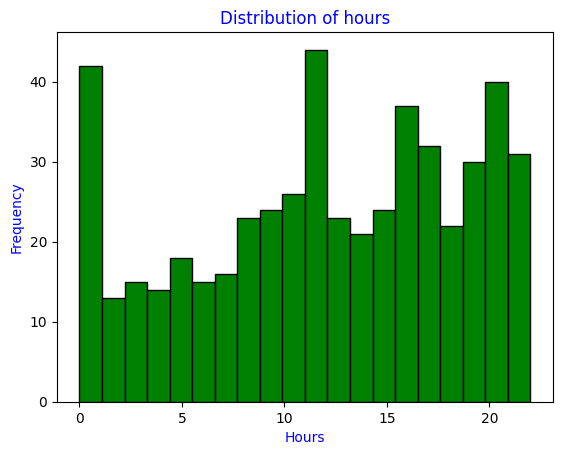

In [ ]:
#@title <font color = "orange" size = "6"> **Behaviour along Day**

plt.hist(df.Hours, color = "green", edgecolor = "black", bins = 20)
plt.title("Distribution of hours", color = "blue")
plt.xlabel("Hours", color = 'blue')
plt.ylabel("Frequency", color = 'blue')
plt.show()

<font color = "blue" size = "5">**At evening period, (16- 23) has high activity due to the all have finished their own tasks.**

<font color = "blue" size = "5">**Around the 10 in hour, this is because the break duration or that is the time the most wake up.**

<font color = "blue" size = "5">**We can invest that duration to launch promotional campaigns and other time for maintanace activities.**

In [ ]:
pd.crosstab(df.Product_type, df.Payment_mode, normalize = "index")

Payment_mode,Credit,Paypal
Product_type,,
Book,0.614841,0.385159
Online,0.651982,0.348018


In [ ]:
pd.crosstab(df.Product_type, df.Payment_mode, normalize = "columns")

Payment_mode,Credit,Paypal
Product_type,,
Book,0.540373,0.579787
Online,0.459627,0.420213


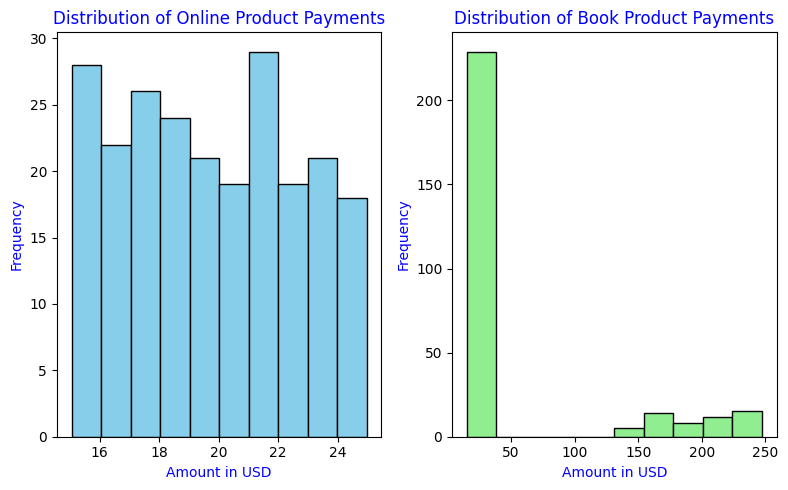

In [ ]:
#@title <font color = "orange" size = "6"> **Distribution of amounts paid for book & online**

# Create subplots
fig, ax = plt.subplots(figsize=(8, 5), nrows=1, ncols=2)

# Plot histogram for "Online" product type
ax[0].hist(df[df["Product_type"] == "Online"]["Amount_in_usd"], edgecolor="black", color="skyblue")
ax[0].set_title("Distribution of Online Product Payments", color="blue")
ax[0].set_xlabel("Amount in USD", color="blue")
ax[0].set_ylabel("Frequency", color="blue")

# Plot histogram for "Book" product type
ax[1].hist(df[df["Product_type"] == "Book"]["Amount_in_usd"], edgecolor="black", color="lightgreen")
ax[1].set_title("Distribution of Book Product Payments", color="blue")
ax[1].set_xlabel("Amount in USD", color="blue")
ax[1].set_ylabel("Frequency", color="blue")

# Adjust layout and display plot
plt.tight_layout()
plt.show()


In [ ]:
df.Product_type.value_counts()

Product_type
Book      283
Online    227
Name: count, dtype: int64

<Axes: ylabel='Amount_in_usd'>

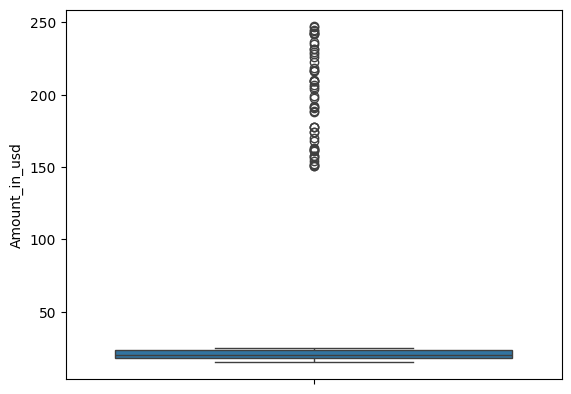

In [ ]:
sns.boxplot(df["Amount_in_usd"])

In [ ]:
# Calculate Q1 and Q3
Q1 = np.percentile(df.Amount_in_usd, 25)
Q3 = np.percentile(df.Amount_in_usd, 75)

# Calculate IQR
IQR = Q3 - Q1

In [ ]:
# Detect outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = [x for x in df.Amount_in_usd if x < lower_bound or x > upper_bound]

In [ ]:
len(outliers)

54

<font color = "blue" size = "5">**I noticed that outliers are real values, so I won't deal with them**


In [12]:
# encode
df.replace({"West" :1, "South" :2, "East" :3, "North" : 4}, inplace = True)

In [13]:
# Apply one-hot encoding to specific columns
df_encoded = pd.get_dummies(df, columns= [ 'Payment_mode', 'how_they_buy','Product_type'], drop_first= True)
df_encoded.head()

,Cust iD,Region,Amount_in_usd,Hours,Minutes,Payment_mode_Paypal,how_they_buy_Web,Product_type_Online
0,10001,3,20.19,22,19,True,True,True
1,10002,1,17.85,13,27,False,True,True
2,10003,4,23.98,14,27,False,True,True
3,10004,1,23.51,15,38,True,False,False
4,10005,2,15.33,15,21,False,True,False


In [14]:
df_encoded.drop(columns = ["Cust iD"], inplace = True)
df_encoded.Minutes = df_encoded.Minutes.astype("int64")
df_encoded.replace({True : 1, False : 0}, inplace = True)

In [15]:
df_encoded.drop(columns = ["Minutes"], inplace = True)

# <font color = "orange">**Modeling 🔥🎊🎉**

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [17]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [29]:
# copies of original df for apply scaling
df_minmax_all = df_encoded.copy()
df_standard_all = df_encoded.copy()

In [30]:
# min max scaling
scaler_minmax = MinMaxScaler()
df_minmax_all['Amount_in_usd'] = scaler_minmax.fit_transform(df_minmax_all[['Amount_in_usd']])
# Standard Scaling
standard_scaling = StandardScaler()
df_standard_all['Amount_in_usd'] = standard_scaling.fit_transform(df_standard_all['Amount_in_usd'].values.reshape(-1, 1))

In [32]:
df_standard_part = df_minmax_all[["Amount_in_usd", "Product_type_Online"]]
df_minmax_part = df_minmax_all[["Amount_in_usd", "Product_type_Online"]]


# <font color = "orange" size = "6">**K-mean++ AGORITHM**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

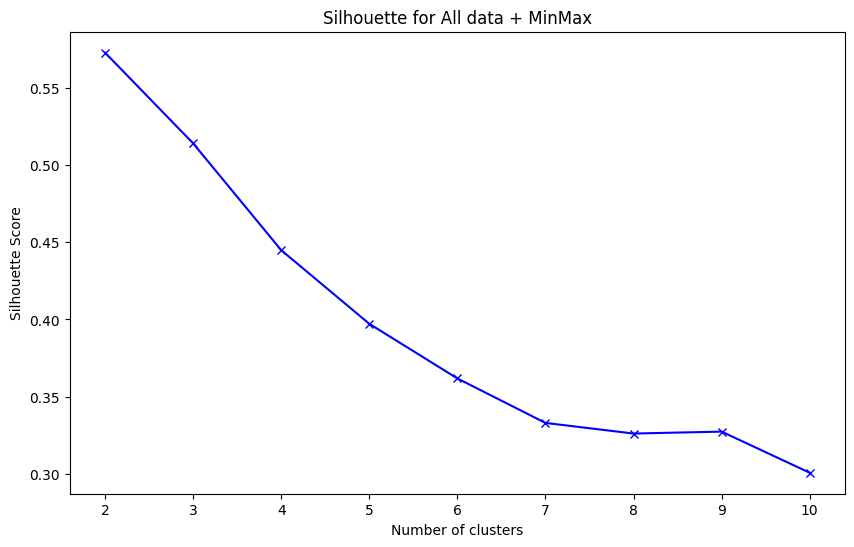

In [21]:
# All Data + minMax scaling
# Compute silhouette score for different number of clusters
silhouette_scores = []
K = range(2, 11)  # Silhouette score requires at least 2 clusters
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_minmax_all)
    score = silhouette_score(df_minmax_all, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette for All data + MinMax')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

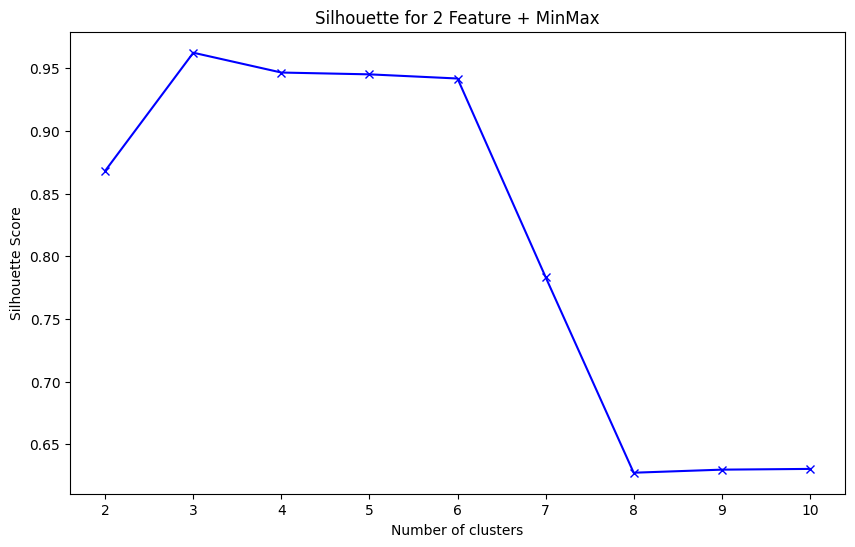

In [22]:
# "Amount_in_usd", "Product_type_Online"  + minMax scaling
# Compute silhouette score for different number of clusters

silhouette_scores = []
K = range(2, 11)  # Silhouette score requires at least 2 clusters
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_minmax_part)
    score = silhouette_score(df_minmax_part, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette for 2 Feature + MinMax')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

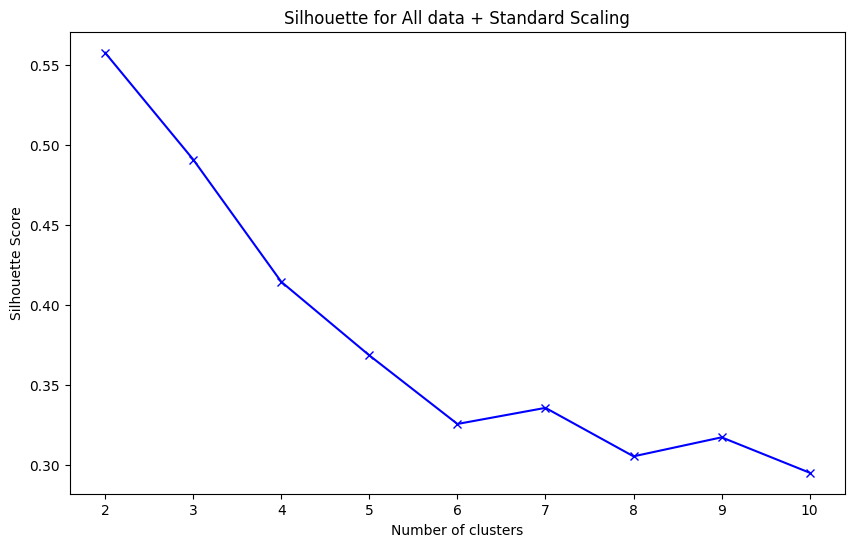

In [23]:
# All Data + standard scaling
# Compute silhouette score for different number of clusters
silhouette_scores = []
K = range(2, 11)  # Silhouette score requires at least 2 clusters
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_standard_all)
    score = silhouette_score(df_standard_all, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette for All data + Standard Scaling')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

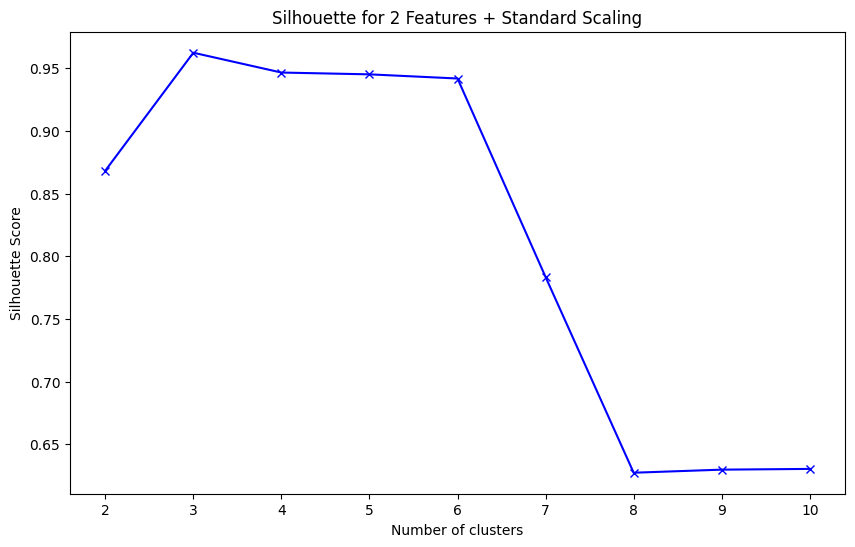

In [24]:
# "Amount_in_usd", "Product_type_Online"  + minMax scaling
# Compute silhouette score for different number of clusters

silhouette_scores = []
K = range(2, 11)  # Silhouette score requires at least 2 clusters
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_standard_part)
    score = silhouette_score(df_standard_part, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette for 2 Features + Standard Scaling')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

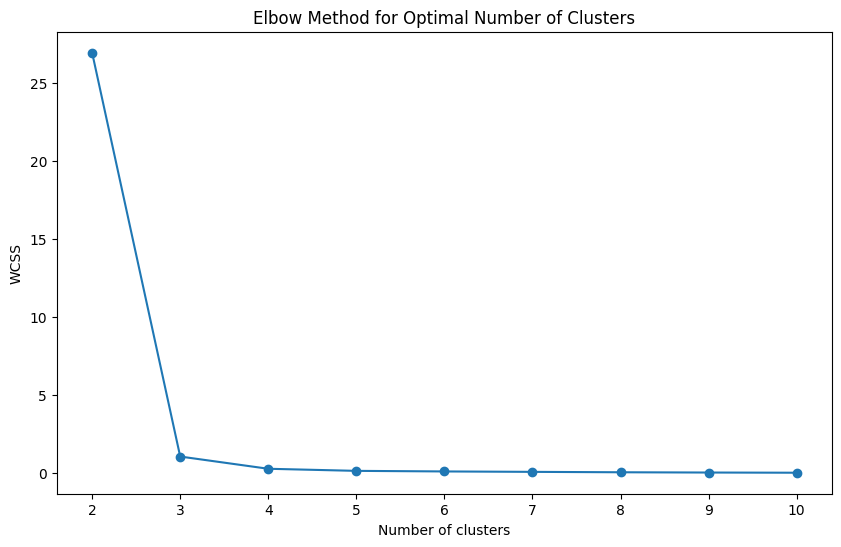

In [25]:
# Calculate WCSS for different numbers of clusters
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_minmax_part)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Average silhouette score for 3 clusters: 0.9623870755078152


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Average silhouette score for 4 clusters: 0.9465782712691164


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Average silhouette score for 5 clusters: 0.945135355362458


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Average silhouette score for 6 clusters: 0.9418194502392473


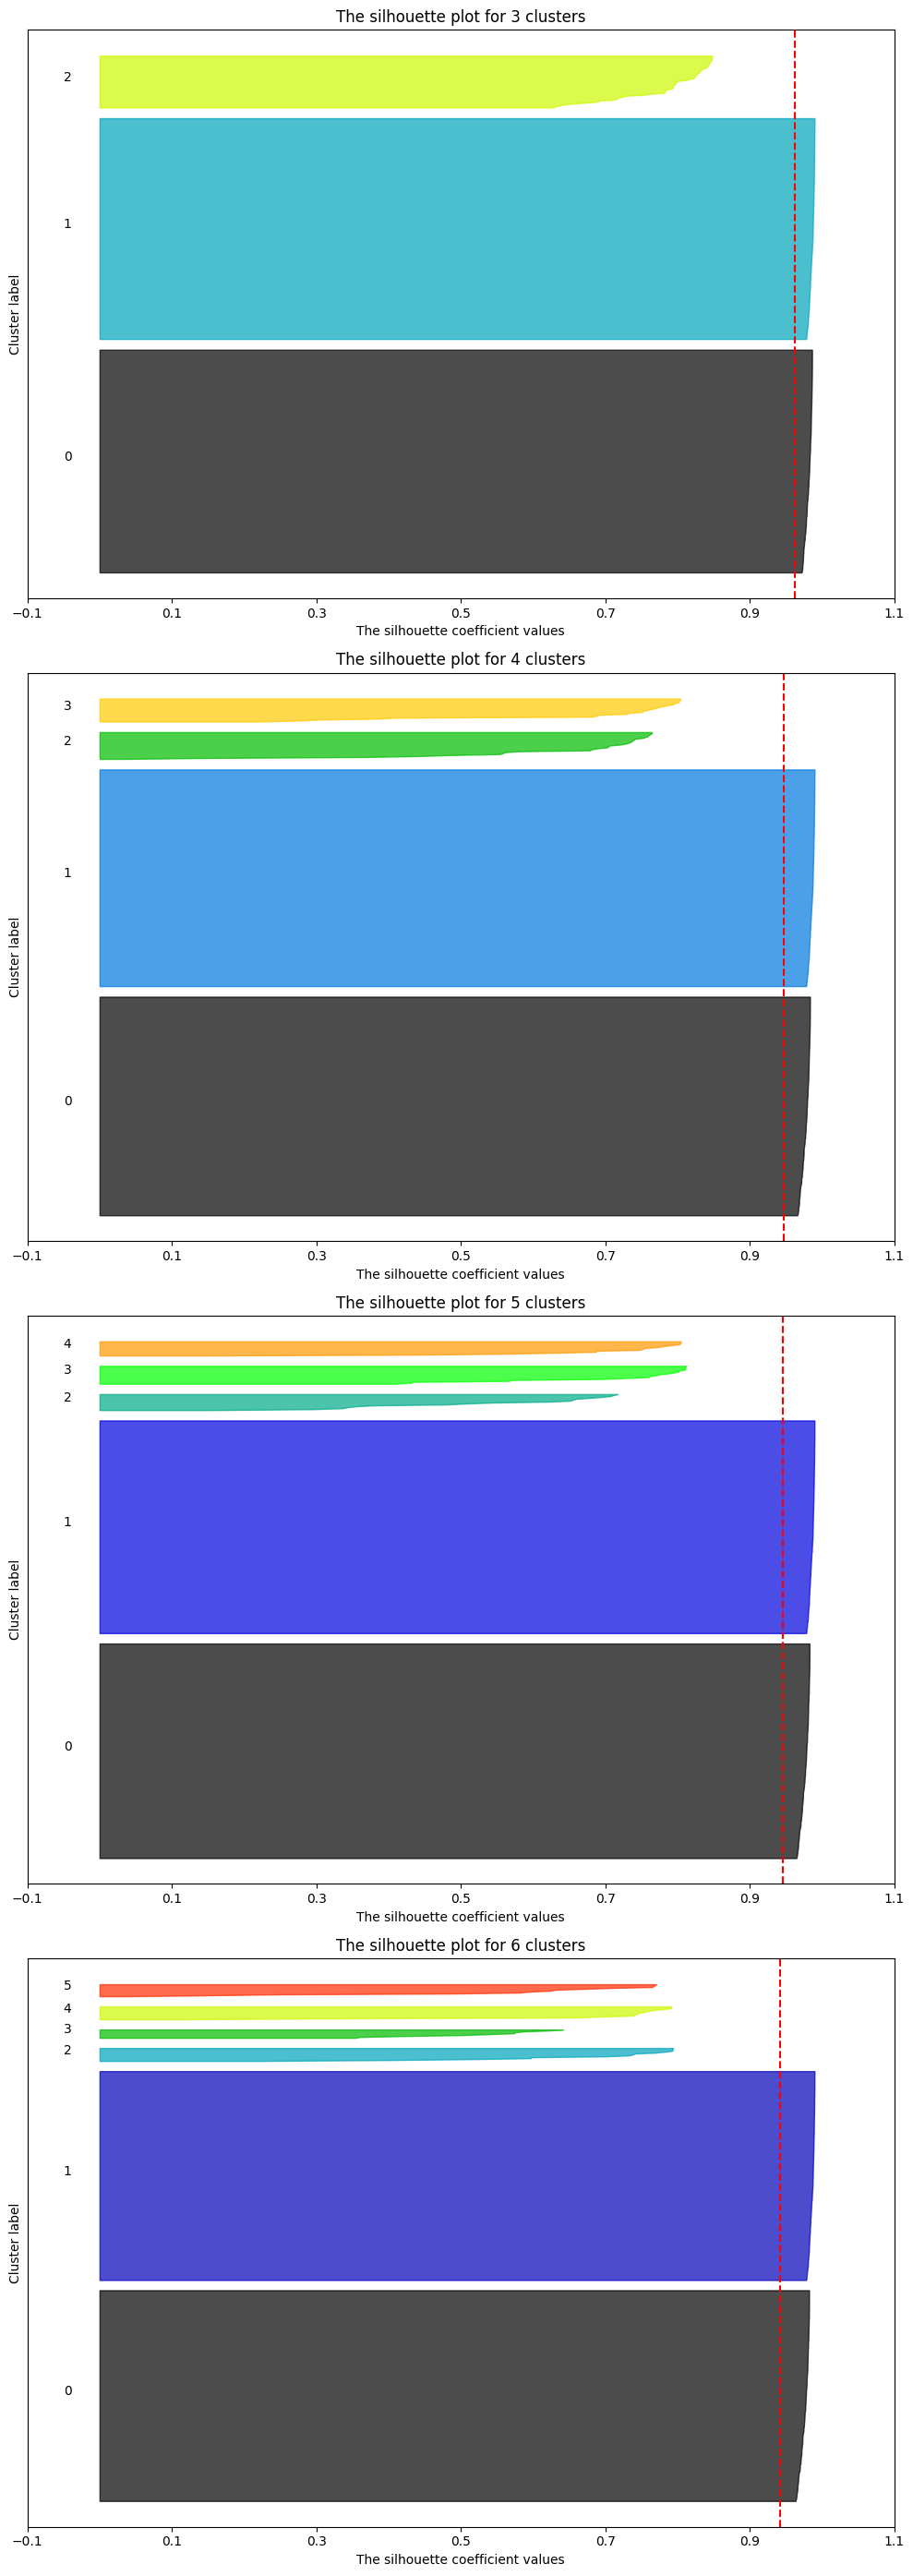

In [ ]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score


# List of n_clusters to evaluate
n_clusters_list = [3, 4, 5, 6]

# Create a subplot for each n_clusters
fig, axs = plt.subplots(len(n_clusters_list), 1, figsize=(10, 7 * len(n_clusters_list)))

for idx, n_clusters in enumerate(n_clusters_list):
    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df_minmax_part)

    # Calculate the silhouette scores for each sample
    silhouette_avg = silhouette_score(df_minmax_part, cluster_labels)
    print(f"Average silhouette score for {n_clusters} clusters: {silhouette_avg}")
    sample_silhouette_values = silhouette_samples(df_minmax_part, cluster_labels)

    # Plotting the silhouette scores
    ax = axs[idx]
    y_lower = 10

    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title(f"The silhouette plot for {n_clusters} clusters")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks(np.arange(-0.1, 1.1, 0.2))

plt.tight_layout()
plt.show()


In [26]:
# Apply K-means
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df_minmax_part)
score = silhouette_score(df_minmax_part, kmeans.labels_)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.9623870755078152


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [34]:
df_minmax_part['Amount_in_usd'] = scaler_minmax.inverse_transform(df_minmax_part['Amount_in_usd'].values.reshape(-1, 1))

<ipython-input-34-872e176151de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_minmax_part['Amount_in_usd'] = scaler_minmax.inverse_transform(df_minmax_part['Amount_in_usd'].values.reshape(-1, 1))


In [35]:
labels = kmeans.labels_  # Convert labels to integers
clusters = pd.concat([df_minmax_part, pd.DataFrame({'cluster': labels})], axis=1)
clusters.head()

,Amount_in_usd,Product_type_Online,cluster
0,20.19,1,0
1,17.85,1,0
2,23.98,1,0
3,23.51,0,1
4,15.33,0,1


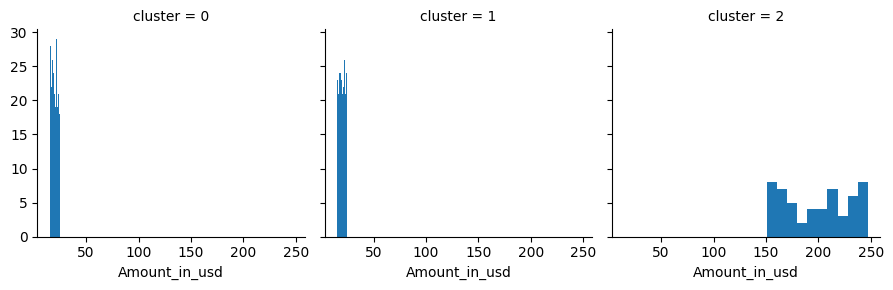

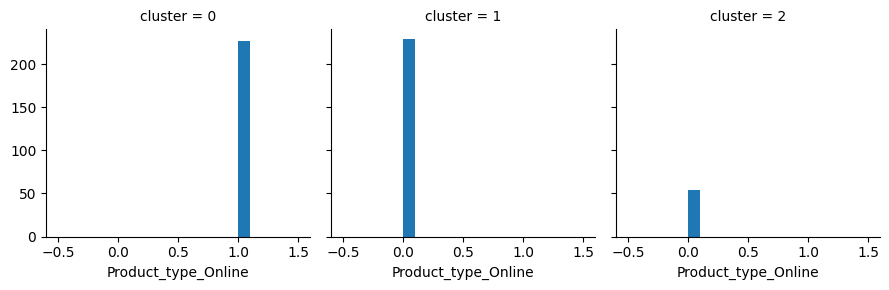

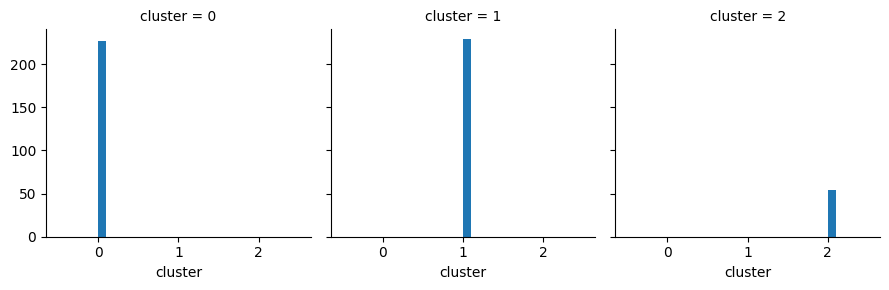

In [36]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

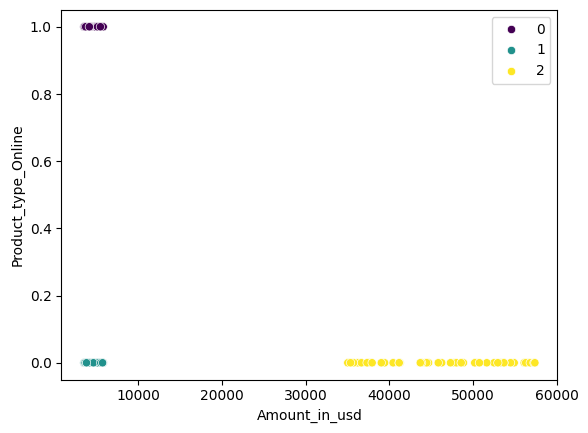

In [ ]:
sns.scatterplot(x = "Amount_in_usd", y = "Product_type_Online", hue = kmeans.labels_, data = df_minmax_part, palette="viridis")
plt.show()

# <font color = "orange" size = "6">**DBSCAN AGORITHM**

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Initialize and fit DBSCAN
dbscan = DBSCAN(eps=3, min_samples=6)
db_labels = dbscan.fit_predict(df_encoded)

# Count the number of clusters
clusters = set(db_labels)
print("Number of clusters:", len(clusters))
print("Labels are : ", clusters)

# Calculate silhouette score
silhouette = silhouette_score(df_encoded, db_labels)
print("Silhouette Score:", silhouette)


Number of clusters: 2
Labels are :  {0, -1}
Silhouette Score: 0.9308920543561627


In [ ]:
labels = dbscan.labels_  # Convert labels to integers
clusters_db = pd.concat([df_encoded, pd.DataFrame({'cluster': labels})], axis=1)
clusters_db.head()

,Region,Amount_in_usd,Hours,Payment_mode_Paypal,how_they_buy_Web,Product_type_Online,cluster
0,3,20.19,22,1,1,1,0
1,1,17.85,13,0,1,1,0
2,4,23.98,14,0,1,1,0
3,1,23.51,15,1,0,0,0
4,2,15.33,15,0,1,0,0


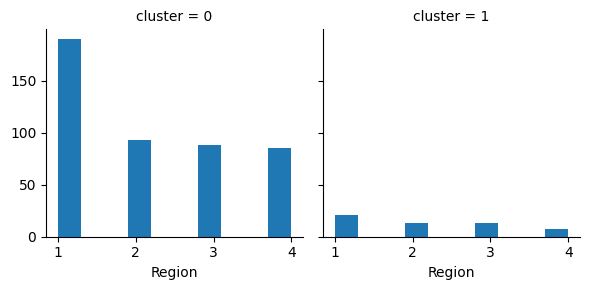

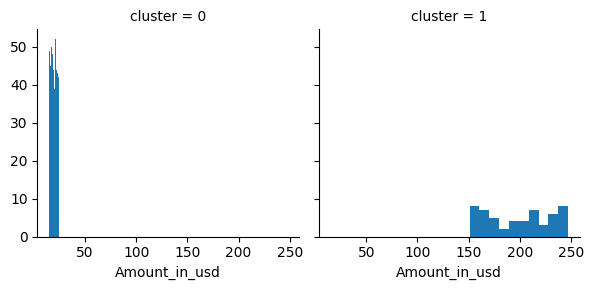

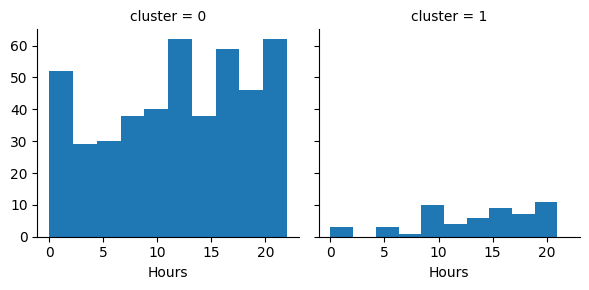

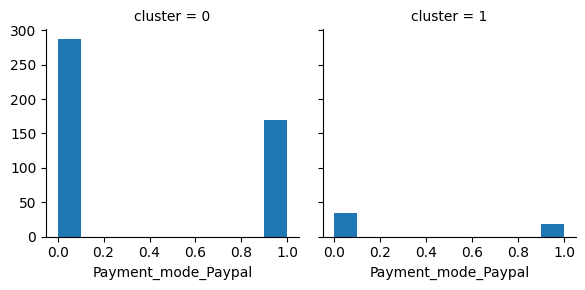

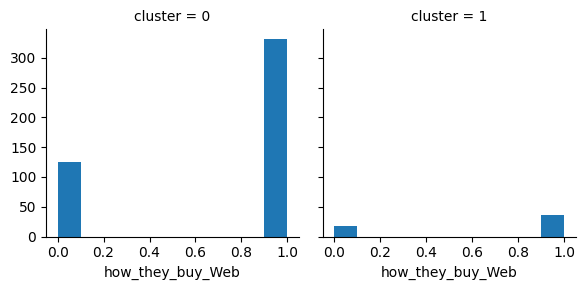

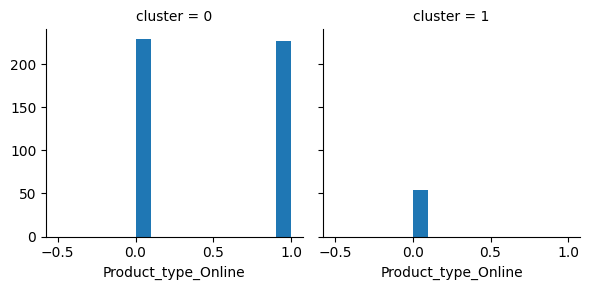

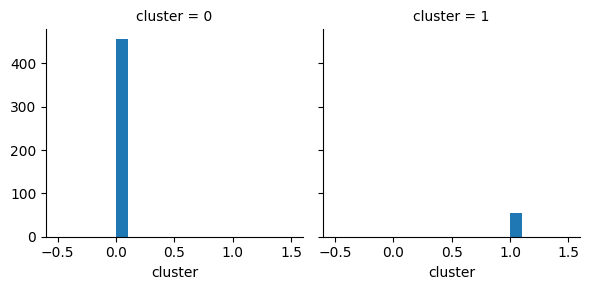

In [ ]:
for c in clusters_db:
    grid= sns.FacetGrid(clusters_db, col='cluster')
    grid.map(plt.hist, c)

In [ ]:
# Initialize and fit DBSCAN
dbscan = DBSCAN(eps=11, min_samples=7) # eps = 8,9, 10 with min_sample : 5-7 gave good score
db_labels = dbscan.fit_predict(df_encoded[["Amount_in_usd", "Product_type_Online"]])

# Count the number of clusters
clusters = set(db_labels)
print("Number of clusters:", len(clusters))
print("Labels are : ", clusters)

# Calculate silhouette score
silhouette = silhouette_score(df_encoded[["Amount_in_usd", "Product_type_Online"]], db_labels)
print("Silhouette Score:", silhouette)

Number of clusters: 2
Labels are :  {0, 1}
Silhouette Score: 0.9598737138914774


In [ ]:
labels = dbscan.labels_  # Convert labels to integers
clusters_db = pd.concat([df_encoded[["Amount_in_usd", "Product_type_Online"]], pd.DataFrame({'cluster': labels})], axis=1)
clusters_db.head()

,Amount_in_usd,Product_type_Online,cluster
0,20.19,1,0
1,17.85,1,0
2,23.98,1,0
3,23.51,0,0
4,15.33,0,0


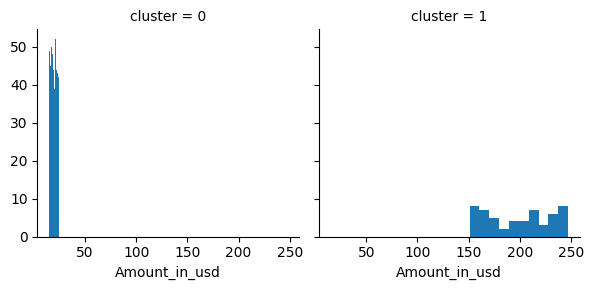

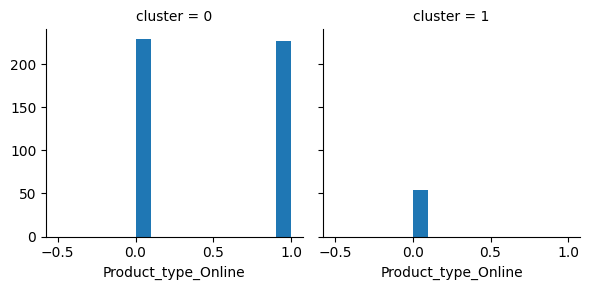

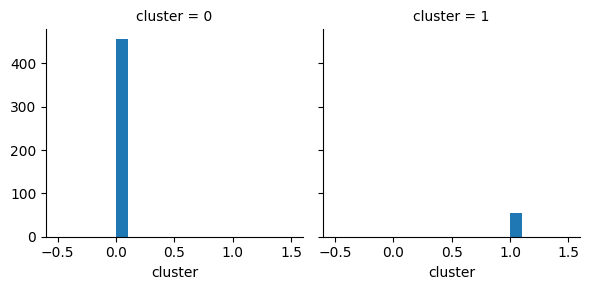

In [ ]:
for c in clusters_db:
    grid= sns.FacetGrid(clusters_db, col='cluster')
    grid.map(plt.hist, c)